In [522]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from typing import List
from sklearn.model_selection import train_test_split

In [531]:
df = pd.read_csv('complete_houses_mod.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('Price of square meter', inplace=True, axis=1)
def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

df = remove_outliers(df, ['Living area'], 3)
df = remove_outliers(df, ['Surface of the land'], 3)
df = remove_outliers(df, ['Garden surface'], 3)
df = remove_outliers(df, ['Terrace surface'], 3)

print(df['Living area'].max())
print(df['Surface of the land'].max())
df

Working on column: Living area
Working on column: Surface of the land
Working on column: Garden surface
Working on column: Terrace surface
3410
16254


,id,Zip,Price,Living area,Number of rooms,Garden surface,Terrace surface,Open fire,Surface of the land,Number of facades,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption,Energy efficiency
0,10578809,1770,349000,180,3,150,25,0,256,2,0,4,3,241,5
1,10578941,8200,625000,185,3,400,0,0,539,3,0,4,3,292,5
2,10577515,4100,149000,105,2,25,9,0,105,2,0,3,2,469,3
3,10577846,5300,335000,209,4,698,36,0,2185,4,0,3,1,196,6
4,10523130,1190,545000,254,4,0,45,0,260,2,0,2,1,517,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9339,10531072,3520,382230,163,3,406,0,0,406,3,0,2,1,355,4
9340,10531067,3520,382484,163,3,405,0,0,405,3,0,2,1,355,4
9341,10531070,3520,384070,163,3,405,0,0,405,3,0,2,1,355,4
9342,10437655,8530,406000,185,3,0,3,0,300,3,0,1,0,438,3


In [524]:
df.isnull().sum().sort_values(ascending=False)

id                            0
Zip                           0
Price                         0
Living area                   0
Number of rooms               0
Garden surface                0
Terrace surface               0
Open fire                     0
Surface of the land           0
Number of facades             0
Swimming pool                 0
Building Cond. values         0
Kitchen values                0
Primary energy consumption    0
Energy efficiency             0
dtype: int64

In [525]:
'''
'Living area'
'Number of rooms'
'Garden surface'
'Terrace surface'
'Open fire'
'Surface of the land'
'Number of facades'
'Swimming pool'
'Building Cond. values'
'Kitchen values'
'Primary energy consumption'
'Energy efficiency'
'''

"\n'Living area'\n'Number of rooms'\n'Garden surface'\n'Terrace surface'\n'Open fire'\n'Surface of the land'\n'Number of facades'\n'Swimming pool'\n'Building Cond. values'\n'Kitchen values'\n'Primary energy consumption'\n'Energy efficiency'\n"

In [526]:
features = list(df.drop(columns=['Zip','Price', 'id','Garden surface','Primary energy consumption'
                                 ]).columns)

X = df[features].to_numpy()
y = df[['Price']].to_numpy().reshape(-1 , 1)

# Instantiate the scaler
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

# Normalize the training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lm = LinearRegression() 
lm.fit(X_train, y_train)

#normalize the whole dataset for scoring
X = scaler.transform(X)

score = lm.score(X_test, y_test)
coeff_df = pd.DataFrame(lm.coef_, columns=features)
coeff_df = coeff_df.T
coeff_df.columns = ['Coefficient']
predictions = lm.predict(X_test) 
coeff_df


,Coefficient
Living area,150646.937412
Number of rooms,53420.060476
Terrace surface,8172.275243
Open fire,17747.126383
Surface of the land,38789.204308
Number of facades,18539.761322
Swimming pool,34479.653495
Building Cond. values,34549.548300
Kitchen values,48206.802805
Energy efficiency,26098.090217


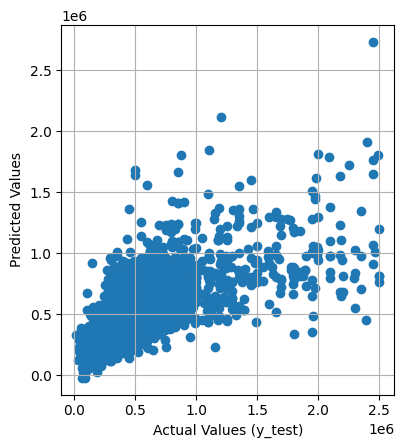

(5530, 10)
(9217, 10)
score:
0.5002432898558166
[473068.12495479]


In [527]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.axis('scaled')
plt.show()

print(X_train.shape)
print(X.shape)

print('score:')
print(score)
print(lm.intercept_)

(-108200.0, 2624200.0, -161091.07850146785, 2871765.813953303)

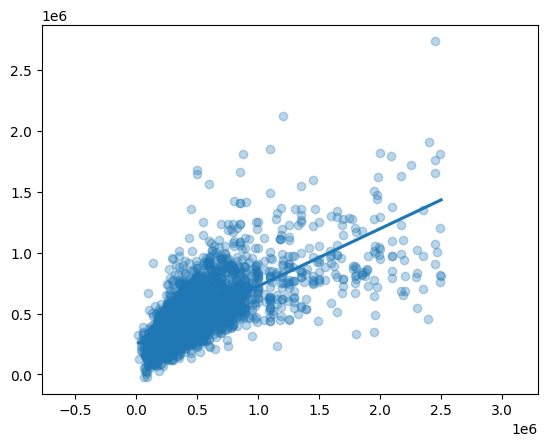

In [528]:
sns.regplot(x=y_test,y=predictions,ci=None,scatter_kws={'alpha': 0.3})
plt.axis('equal')

/tmp/ipykernel_347/1061164399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: ylabel='Density'>

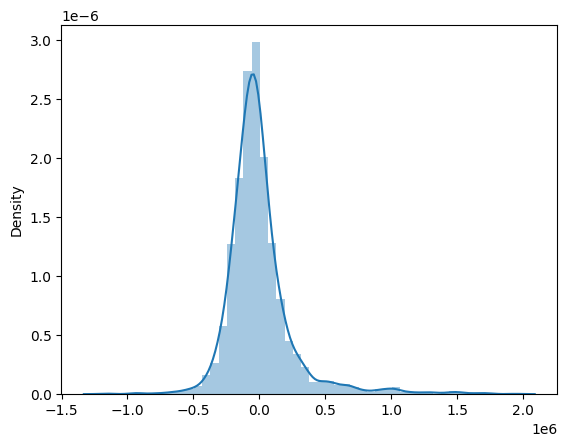

In [529]:
sns.distplot((y_test-predictions),bins=50)

In [530]:
df.skew()

id                           -3.341354
Zip                           0.187442
Price                         2.447029
Living area                   4.219611
Number of rooms               2.748121
Garden surface                8.599233
Terrace surface               2.400547
Open fire                     6.342182
Surface of the land           5.054441
Number of facades             0.195909
Swimming pool                 4.766762
Building Cond. values        -0.515658
Kitchen values                0.524098
Primary energy consumption    1.437769
Energy efficiency            -0.266258
dtype: float64